<a href="https://colab.research.google.com/github/mnikahava/ydatadl/blob/master/dl_0003_pytorch_ffn_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW Seedlings Classification

# Install PyTorch

In [0]:
import sys
sys.version

%reset -f
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
import sys
sys.version

# !pip3 install torch==0.4
# !pip3 install torchvision

!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(0)

    100% |████████████████████████████████| 484.0MB 28kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b1f4000 @  0x7f64b6ac02a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 4.1MB/s 
    100% |████████████████████████████████| 2.0MB 14.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 60.4MB/s 


In [1]:
!pip3 install torchvision

# Import PyTorch

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F 
print(torch.__version__)
import torchvision.transforms as transforms


import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

use_cuda = torch.cuda.is_available()
# use_cuda = False
import random 
import numpy as np 

print("USE CUDA=" + str (use_cuda))
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

manualSeed = 999
def fixSeed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if use_cuda:
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


if manualSeed is None:
        manualSeed = 999
fixSeed(manualSeed)



0.4.0
__Python VERSION: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
__pyTorch VERSION: 0.4.0
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148
__CUDNN VERSION: 7102
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
USE CUDA=True


# Download dataset

In [0]:
!mkdir -p ~/.kaggle

In [4]:
%%file ~/.kaggle/kaggle.json
{"username":"yandexmnikahava","key":"213310530136edc8dd0c889165a758fc"}

Writing /root/.kaggle/kaggle.json


In [5]:
!pip install kaggle --upgrade
!kaggle competitions download -c plant-seedlings-classification

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.1.1)
  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 4.95MB/s]
 98% 84.0M/86.0M [00:00<00:00, 164MB/s]
100% 86.0M/86.0M [00:00<00:00, 171MB/s]
100% 1.60G/1.60G [00:11<00:00, 122MB/s]
100% 1.60G/1.60G [00:11<00:00, 147MB/s]


# Unzip data

In [6]:
!mkdir seeds
!mv train.zip seeds/train.zip
!unzip seeds/train.zip 

Archive:  seeds/train.zip
   creating: train/
   creating: train/Fat Hen/
  inflating: train/Fat Hen/5bdfa3a44.png  
  inflating: train/Fat Hen/a86b9c0cd.png  
  inflating: train/Fat Hen/f3f6559bf.png  
  inflating: train/Fat Hen/946b48f62.png  
  inflating: train/Fat Hen/4d7fd4020.png  
  inflating: train/Fat Hen/2509e5bc5.png  
  inflating: train/Fat Hen/e2462573b.png  
  inflating: train/Fat Hen/7e98e4aa6.png  
  inflating: train/Fat Hen/075cb6666.png  
  inflating: train/Fat Hen/b43d0a350.png  
  inflating: train/Fat Hen/afac20b21.png  
  inflating: train/Fat Hen/4d2efbb45.png  
  inflating: train/Fat Hen/f0923dcd6.png  
  inflating: train/Fat Hen/180f41d53.png  
  inflating: train/Fat Hen/bfdeafadd.png  
  inflating: train/Fat Hen/ac6625b0f.png  
  inflating: train/Fat Hen/ba5c8f87f.png  
  inflating: train/Fat Hen/e7d278e0e.png  
  inflating: train/Fat Hen/efaab2370.png  
  inflating: train/Fat Hen/9d4722e74.png  
  inflating: train/Fat Hen/4e2f543a2.png  
  inflating: train/Fat 

In [7]:
! ls seeds

train.zip


In [8]:
!ls train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


# Organize images

In [0]:
import os, sys, pdb, shutil, time, random
import argparse
import torch
import torch.backends.cudnn as cudnn
import torchvision.transforms as transforms
from tqdm import tqdm
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import time
from shutil import copyfile
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from mpl_toolkits.axes_grid1 import ImageGrid
import pandas as pd
import numpy as np
import torch
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as func
import torchvision
from torchvision import transforms, datasets, models
import random
import sys
from glob import glob
import fnmatch

class GenericDataset(Dataset):
  def __init__(self, labels, root_dir, subset=False, transform=None):
    self.labels = labels
    self.root_dir = root_dir
    self.transform = transform

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    img_name = self.labels.iloc[idx, 0]  # file name
    fullname = join(self.root_dir, img_name)
    image = Image.open(fullname).convert('RGB')
    labels = self.labels.iloc[idx, 2]  # category_id
    #         print (labels)
    if self.transform:
      image = self.transform(image)
    return image, labels

  @staticmethod
  def find_classes(fullDir):
    classes = [d for d in os.listdir(fullDir) if os.path.isdir(os.path.join(fullDir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    num_to_class = dict(zip(range(len(classes)), classes))

    train = []
    for index, label in enumerate(classes):
      path = fullDir + label + '/'
      for file in listdir(path):
        train.append(['{}/{}'.format(label, file), label, index])

    df = pd.DataFrame(train, columns=['file', 'category', 'category_id', ])

    return classes, class_to_idx, num_to_class, df

In [11]:
dataset='train/' # 
data_dir= './' +  dataset
classes, class_to_idx, num_to_class, df =GenericDataset.find_classes(data_dir )

print (classes)
print (class_to_idx)
print (num_to_class)
df.head(5)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
{'Black-grass': 0, 'Charlock': 1, 'Cleavers': 2, 'Common Chickweed': 3, 'Common wheat': 4, 'Fat Hen': 5, 'Loose Silky-bent': 6, 'Maize': 7, 'Scentless Mayweed': 8, 'Shepherds Purse': 9, 'Small-flowered Cranesbill': 10, 'Sugar beet': 11}
{0: 'Black-grass', 1: 'Charlock', 2: 'Cleavers', 3: 'Common Chickweed', 4: 'Common wheat', 5: 'Fat Hen', 6: 'Loose Silky-bent', 7: 'Maize', 8: 'Scentless Mayweed', 9: 'Shepherds Purse', 10: 'Small-flowered Cranesbill', 11: 'Sugar beet'}


,file,category,category_id
0,Black-grass/db337c4e7.png,Black-grass,0
1,Black-grass/ab787fb46.png,Black-grass,0
2,Black-grass/90ea1e327.png,Black-grass,0
3,Black-grass/afaade548.png,Black-grass,0
4,Black-grass/42336b187.png,Black-grass,0


In [12]:
df.category.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: category, dtype: int64

# Split dataset and save to csv

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(
    df, test_size=0.2, random_state=manualSeed,stratify=df.category)
test, validation = train_test_split(    
    test, test_size=0.5, random_state=manualSeed,stratify=test.category)
print('Train size:',len(train))
print('Test size:',len(test))
print('Validation size:',len(validation))
validation.category.value_counts()
train.to_csv('train.csv')
test.to_csv('test.csv')
validation.to_csv('validation.csv')

Train size: 3800
Test size: 475
Validation size: 475


# Image loader

In [15]:
batch_size    = 8   # The size of input data took for one iteration
image_size = 224
norm_std = [0.485, 0.456, 0.406]
norm_mean = [0.229, 0.224, 0.225]

train_trans = transforms.Compose([
    transforms.RandomSizedCrop(image_size),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(norm_std,norm_mean)
])

## Normalization only for validation and test
test_trans = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(norm_std,norm_mean)
])

train_set = GenericDataset(train, data_dir, transform = train_trans)
test_set = GenericDataset(test, data_dir, transform = test_trans)
valid_set = GenericDataset(validation, data_dir, transform = test_trans)
        

trn_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
tst_loader  = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)
vld_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False, num_workers=0)

dataset_sizes = {
    'train': len(trn_loader.dataset), 
    'test': len(tst_loader.dataset), 
    'valid': len(vld_loader.dataset)
}


print (dataset_sizes)

{'train': 3800, 'test': 475, 'valid': 475}


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  "please use transforms.RandomResizedCrop instead.")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


i=0: 
i=1: 
i=2: 
i=3: 


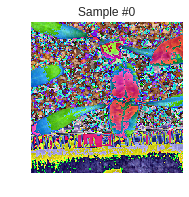

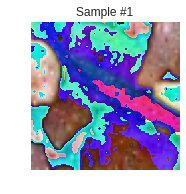

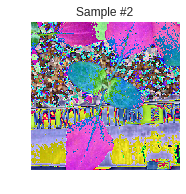

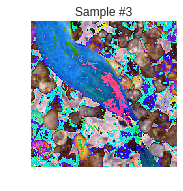

In [16]:
imagesToShow=4

def floatTensorToImage(img, mean=0, std=1):
        """convert a tensor to an image"""
        img = np.transpose(img.numpy(), (1, 2, 0))
        img = (img*std+ mean)*255
        img = img.astype(np.uint8)    
        return img    

if __name__ == '__main__':  
    for i, data in enumerate(trn_loader, 0):
        print('i=%d: '%(i))            
        images, labels = data            
        num = len(images)

        plt.figure(figsize=(10,5))
        ax = plt.subplot(1, imagesToShow, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{}'.format(i))
        ax.axis('off')

        for n in range(num):
            image=images[n]
            label=labels[n]
            plt.imshow (floatTensorToImage(image))

        if i==imagesToShow-1:
            break

# Build Feedforward Neural Network

### Feedforward Neural Network Model Structure

### NetA
The FNN includes two fully-connected layers (i.e. fc1 & fc2) and a non-linear ReLU layer in between. Normally we call this structure **1-hidden layer FNN**, without counting the output layer (fc2) in.

By running the forward pass, the input images (x) can go through the neural network and generate a output (out) demonstrating how are the likabilities it belongs to each of the 10 classes. _For example, a cat image can have 0.8 likability to a dog class and a 0.3 likability to a airplane class._


In [0]:
input_size    = 150528   # The image size = 224 x 224 x 3 = 150528
hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = df.category.nunique()    # The number of output classes

num_epochs    = 100     # The number of times entire dataset is trained
learning_rate = 0.001  # The speed of convergence
momentum = 0.9

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class NetA(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NetA, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Instantiate the FNN

We now create a real FNN based on our structure.

In [19]:
neta = NetA(input_size, hidden_size, num_classes)
print (neta)

NetA(
  (fc1): Linear(in_features=150528, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=12, bias=True)
)


# When using several GPU's

In [20]:
if use_cuda:
    model = neta.cuda()
model_name = (type(model).__name__) # remember the real name
print(model_name)
print(model)

# for using more than one GPU
model = torch.nn.DataParallel(model, device_ids=list(range(1)))
print(model)

NetA
NetA(
  (fc1): Linear(in_features=150528, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=12, bias=True)
)
DataParallel(
  (module): NetA(
    (fc1): Linear(in_features=150528, out_features=500, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=500, out_features=12, bias=True)
  )
)


# Enable GPU

_**Note**: You could enable this line to run the codes on GPU_

In [0]:
use_cuda = True

In [0]:
if use_cuda and torch.cuda.is_available():
    neta.cuda()

# Choose the Loss Function and Optimizer

Loss function (**criterion**) decides how the output can be compared to a class, which determines how good or bad the neural network performs. And the **optimizer** chooses a way to update the weight in order to converge to find the best weights in this neural network.

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neta.parameters(), lr=learning_rate)#torch.optim.SGD(neta.parameters(), lr=learning_rate, momentum=momentum)# SGD#Adam

print (criterion)
print (optimizer)


CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


# Training the FNN Model

This process might take around 3 to 5 minutes depending on your machine. The detailed explanations are listed as comments (#) in the following codes.

In [26]:
!pip install livelossplot

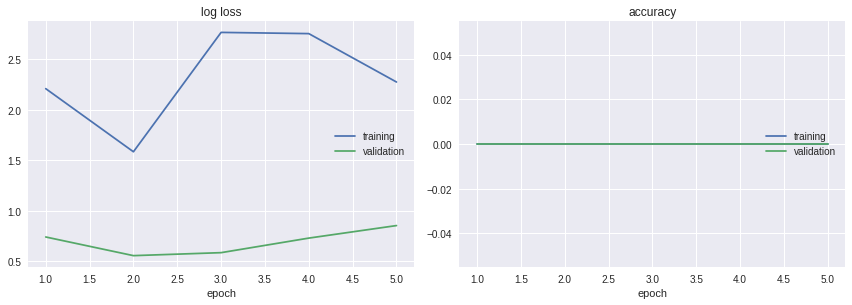

log loss:
training   (min:    1.584, max:    2.765, cur:    2.274)
validation (min:    0.556, max:    0.854, cur:    0.854)

accuracy:
training   (min:    0.000, max:    0.000, cur:    0.000)
validation (min:    0.000, max:    0.000, cur:    0.000)


In [32]:
# from tqdm import tqdm
from livelossplot import PlotLosses

liveloss = PlotLosses()
num_epochs=5

for epoch in range(num_epochs):
  epoch_loss = 0.0
  epoch_correct = 0
  epoch_loss_val = 0.0
  epoch_correct_val = 0
  
  neta.train() # set training mode
  for i, (images, labels) in enumerate(trn_loader):   # Load a batch of images with its (index, data, class)
    #         print(images.shape)
    images = Variable(images.view(-1, 3*224*224))         # Convert torch tensor to Variable: change image from a vector to a matrix
    labels = Variable(labels)
        
    if use_cuda and torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
        
    optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
#         print(images.shape)
    outputs = neta(images)                             # Forward pass: compute the output class given a image
    loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
    loss.backward()                                   # Backward pass: compute the weight
    optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
                
    epoch_loss += loss.data[0]
    print(outputs.max(1)[1], labels)
    epoch_correct += (outputs.max(1)[1] == labels).sum().data[0]

    if (i+1) % 100 == 0:                              # Logging
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_set)//batch_size, loss.data[0]))

  avg_loss = epoch_loss / len(trn_loader.dataset)
  print(len(trn_loader.dataset), 'correct=',epoch_correct)
  avg_accuracy = epoch_correct / len(trn_loader.dataset)   
  
  neta.eval()
  for i, (images, labels) in enumerate(vld_loader):
    images = Variable(images.view(-1, 3*224*224))         # Convert torch tensor to Variable: change image from a vector to a matrix
    labels = Variable(labels)

    if use_cuda and torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
    
    outputs = neta(images)                             # Forward pass: compute the output class given a image
    loss = criterion(outputs, labels)     

    epoch_loss_val += loss.data[0]
    epoch_correct_val += (outputs.max(1)[1] == labels).sum().data[0]

  avg_loss_val = epoch_loss_val / len(vld_loader.dataset)
  avg_accuracy_val = epoch_correct_val / len(vld_loader.dataset)
    
    
  liveloss.update({
        'log loss': avg_loss,
        'val_log loss': avg_loss_val,
        'accuracy': avg_accuracy,
        'val_accuracy': avg_accuracy_val
    })
  liveloss.draw()


# Save the trained Model for future use

We save the trained model as a pickle that can be loaded and used later.

In [0]:
torch.save(neta.state_dict(), 'NetA_model.pkl')